In [2]:
from IPython.display import HTML
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

# Preprocessing of the NRD data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
pd.set_option('display.expand_frame_repr', False)

In [2]:
%matplotlib inline

In [2]:
path = '/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/NRD/'

In [2]:
path = '/nfs/turbo/umms-awaljee/wsliu/Data/NRD/'

In [3]:
from ccs_tools import dx_multi, pr_multi, dx_label, core_cols, core_dtypes_pd, na_values

## Code Frequency Collection

In [4]:
DXs = ['DX'+str(j) for j in range(2, 31)]
PRs = ['PR'+str(j) for j in range(1, 16)]

In [5]:
DX1_freq = pd.DataFrame(dict(DX1=dx_multi.ICD9CM_CODE, frequency=0), index=dx_multi.index)
DX_freq = pd.DataFrame(dict(DX=dx_multi.ICD9CM_CODE, frequency=0), index=dx_multi.index)
PR_freq = pd.DataFrame(dict(PR=pr_multi.ICD9CM_CODE, frequency=0), index=pr_multi.index)

In [6]:
chunked = pd.read_table(path+'raw/2014/NRD_2014_Core.CSV', sep=',', 
                           header = None, 
                           names=core_cols, 
                           dtype=core_dtypes_pd, 
                           na_values=na_values, 
                           chunksize=10**6)

In [18]:
chunk = next(chunked)

In [32]:
start = time.time()
chunk = next(chunked)
print(time.time()-start)

19.4794020652771


In [41]:
chunk_id = 0
start = time.time()
for chunk in chunked:
    dx1_counts = chunk.DX1.value_counts()
    dx1_counts = dx1_counts.loc[dx1_counts.index.isin(DX1_freq.index)]
    DX1_freq.loc[dx1_counts.index, 'frequency'] += dx1_counts.values
    for dx in DXs:
        dx_counts = chunk[dx].value_counts()
        dx_counts = dx_counts.loc[dx_counts.index.isin(DX_freq.index)]
        DX_freq.loc[dx_counts.index, 'frequency'] += dx_counts.values
    for pr in PRs:
        pr_counts = chunk[pr].value_counts()
        pr_counts = pr_counts.loc[pr_counts.index.isin(PR_freq.index)]
        PR_freq.loc[pr_counts.index, 'frequency'] += pr_counts.values
    print('Chunk {} is finished. It takes {:.1f} sec.'.format(chunk_id, time.time()-start))
    chunk_id += 1
    start = time.time()

Chunk 0 is finished. It takes 22.1 sec.
Chunk 1 is finished. It takes 22.0 sec.
Chunk 2 is finished. It takes 21.9 sec.
Chunk 3 is finished. It takes 22.1 sec.
Chunk 4 is finished. It takes 21.9 sec.
Chunk 5 is finished. It takes 22.0 sec.
Chunk 6 is finished. It takes 22.6 sec.
Chunk 7 is finished. It takes 22.6 sec.
Chunk 8 is finished. It takes 22.2 sec.
Chunk 9 is finished. It takes 22.4 sec.
Chunk 10 is finished. It takes 22.1 sec.
Chunk 11 is finished. It takes 22.2 sec.
Chunk 12 is finished. It takes 22.3 sec.
Chunk 13 is finished. It takes 22.2 sec.
Chunk 14 is finished. It takes 19.6 sec.


In [49]:
DX1_freq.to_csv(path+'all/DX1_freq.csv', index=False)
DX_freq.to_csv(path+'all/DX_freq.csv', index=False)
PR_freq.to_csv(path+'all/PR_freq.csv', index=False)

Frequency collection for elder patients (age>=65):

In [7]:
chunk_id = 0
start = time.time()
for chunk in chunked:
    elder = chunk.loc[chunk.AGE>=65]
    dx1_counts = elder.DX1.value_counts()
    dx1_counts = dx1_counts.loc[dx1_counts.index.isin(DX1_freq.index)]
    DX1_freq.loc[dx1_counts.index, 'frequency'] += dx1_counts.values
    for dx in DXs:
        dx_counts = elder[dx].value_counts()
        dx_counts = dx_counts.loc[dx_counts.index.isin(DX_freq.index)]
        DX_freq.loc[dx_counts.index, 'frequency'] += dx_counts.values
    for pr in PRs:
        pr_counts = elder[pr].value_counts()
        pr_counts = pr_counts.loc[pr_counts.index.isin(PR_freq.index)]
        PR_freq.loc[pr_counts.index, 'frequency'] += pr_counts.values
    print('Chunk {} is finished. It takes {:.1f} sec.'.format(chunk_id, time.time()-start), 
          'Number of rows read: {}'.format(len(elder)))
    chunk_id += 1
    start = time.time()

Chunk 0 is finished. It takes 24.6 sec. Number of rows read: 378771
Chunk 1 is finished. It takes 24.6 sec. Number of rows read: 398947
Chunk 2 is finished. It takes 24.2 sec. Number of rows read: 384172
Chunk 3 is finished. It takes 23.8 sec. Number of rows read: 359940
Chunk 4 is finished. It takes 23.0 sec. Number of rows read: 386499
Chunk 5 is finished. It takes 23.2 sec. Number of rows read: 361630
Chunk 6 is finished. It takes 23.6 sec. Number of rows read: 372699
Chunk 7 is finished. It takes 23.8 sec. Number of rows read: 389833
Chunk 8 is finished. It takes 24.1 sec. Number of rows read: 372696
Chunk 9 is finished. It takes 24.7 sec. Number of rows read: 377942
Chunk 10 is finished. It takes 25.2 sec. Number of rows read: 370472
Chunk 11 is finished. It takes 24.9 sec. Number of rows read: 373009
Chunk 12 is finished. It takes 25.3 sec. Number of rows read: 406832
Chunk 13 is finished. It takes 25.3 sec. Number of rows read: 389709
Chunk 14 is finished. It takes 21.3 sec. Num

In [12]:
sum(DX1_freq.frequency>10)/len(DX1_freq)

0.26811305732484075

In [13]:
sum(DX_freq.frequency>10)/len(DX_freq)

0.47724256900212314

In [14]:
sum(PR_freq.frequency>10)/len(PR_freq)

0.660081053698075

In [15]:
DX1_freq.to_csv(path+'elder/DX1_freq.csv', index=False)
DX_freq.to_csv(path+'elder/DX_freq.csv', index=False)
PR_freq.to_csv(path+'elder/PR_freq.csv', index=False)

## Age and Gender Summary

In [6]:
chunked = pd.read_table(path+'raw/2014/NRD_2014_Core.CSV', sep=',', 
                           header = None, 
                           names=core_cols, 
                           dtype=core_dtypes_pd, 
                           na_values=na_values, 
                           chunksize=10**6)

In [7]:
sub = pd.DataFrame()
chunk_id = 0
for chunk in chunked:
    sub1 = chunk[['KEY_NRD', 'NRD_VisitLink', 'AGE', 'FEMALE']]
    sub = pd.concat([sub, sub1])
    print('Chunk', chunk_id, 'finished.')
    chunk_id += 1

Chunk 0 finished.
Chunk 1 finished.
Chunk 2 finished.
Chunk 3 finished.
Chunk 4 finished.
Chunk 5 finished.
Chunk 6 finished.
Chunk 7 finished.
Chunk 8 finished.
Chunk 9 finished.
Chunk 10 finished.
Chunk 11 finished.
Chunk 12 finished.
Chunk 13 finished.
Chunk 14 finished.


In [10]:
sub.AGE.mean(), sub.AGE.std()

(52.801208396619636, 24.75132234357384)

In [9]:
sub.FEMALE.mean()

0.5806308629838184

In [8]:
sub.shape

(14894613, 4)

In [15]:
sub.to_csv(path+'age_gender.csv', index=False)

## Creating readmission labels
In this section we create two labels for each admission: (1) whether this admission is planned (2) whether this admission is followed by a 30-day readmission. This applies to admission with all DX1. 

Defining the variable(coloumn) names, data types, and missing values (these are extracted from the NRD SAS load programs):

In [6]:
from ccs_tools import core_dtypes_pd, core_cols, core_labels, core_dtypes_logic, na_values

In [6]:
core_var_lst = pd.DataFrame(dict(var=core_cols, label=core_labels, dtype_logic=core_dtypes_logic))

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(core_var_lst)

,dtype_logic,label,var
0,continuous,Age in years at admission,AGE
1,categorical,Admission day is a weekend,AWEEKEND
2,categorical,Died during hospitalization,DIED
3,continuous,Weight to discharges in AHA universe,DISCWT
4,categorical,Disposition of patient (uniform),DISPUNIFORM
5,categorical,Discharge month,DMONTH
6,categorical,Discharge quarter,DQTR
7,categorical,DRG in effect on discharge date,DRG
8,categorical,DRG grouper version used on discharge date,DRGVER
9,categorical,"DRG in use on discharge date, calculated witho...",DRG_NoPOA


Read the Core data file by chunks, and extract only the variables useful for label creation:

In [7]:
PRs = ['PR'+str(j) for j in range(1, 16)]
PRCCSs = ['PRCCS'+str(j) for j in range(1, 16)]

In [5]:
chunked = pd.read_table(path+'raw/2014/NRD_2014_Core.CSV', sep=',', 
                           header = None, 
                           names=core_cols, 
                           dtype=core_dtypes_pd, 
                           na_values=na_values, 
                           chunksize=10**6)

In [6]:
readm = pd.DataFrame()
chunk_id = 1
for chunk in chunked:
    readm1 = chunk[['KEY_NRD', 'NRD_VisitLink', 'NRD_DaysToEvent', 'LOS', 'DX1', 'DXCCS1']+ PRs + PRCCSs]
    readm1 = readm1.dropna(subset=['NRD_DaysToEvent', 'LOS'])
    nrows = len(readm1)
    readm = pd.concat([readm, readm1])
    print('Chunk', chunk_id, 'finished:', nrows, 'rows are read.')
    chunk_id += 1

Chunk 1 finished: 999943 rows are read.
Chunk 2 finished: 999951 rows are read.
Chunk 3 finished: 999971 rows are read.
Chunk 4 finished: 999963 rows are read.
Chunk 5 finished: 999922 rows are read.
Chunk 6 finished: 999899 rows are read.
Chunk 7 finished: 999972 rows are read.
Chunk 8 finished: 999986 rows are read.
Chunk 9 finished: 999902 rows are read.
Chunk 10 finished: 999816 rows are read.
Chunk 11 finished: 999954 rows are read.
Chunk 12 finished: 999902 rows are read.
Chunk 13 finished: 999968 rows are read.
Chunk 14 finished: 999897 rows are read.
Chunk 15 finished: 894547 rows are read.


In [7]:
readm.to_csv(path+'temp/readmission_label.csv', index=False)

In [4]:
readm = pd.read_csv(path+'temp/readmission_label.csv', dtype = core_dtypes_pd, low_memory=False)

In [5]:
readm.shape

(14893593, 36)

In [17]:
readm.tail()

,KEY_NRD,NRD_VisitLink,NRD_DaysToEvent,LOS,DX1,DXCCS1,PR1,PR2,PR3,PR4,...,PRCCS6,PRCCS7,PRCCS8,PRCCS9,PRCCS10,PRCCS11,PRCCS12,PRCCS13,PRCCS14,PRCCS15
14893588,24880143.0,bye60ik,16646.0,1.0,29620,657.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14893589,24887512.0,bylxy1a,13377.0,5.0,2989,659.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14893590,24887821.0,bkes6v9,15272.0,2.0,2989,659.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14893591,24890729.0,brsdnem,13832.0,5.0,29680,657.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14893592,24893855.0,b0twdwx,17098.0,5.0,29690,657.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sort the data by patient id and then visiting day:

In [6]:
readm_sort = readm.sort_values(by=['NRD_VisitLink', 'NRD_DaysToEvent'])

In [17]:
sum(readm['PR1'].isna()), sum(readm['PRCCS1'].isna())

(5060677, 5088149)

Define the code sets for Planned Readmission Algorithm (from Page 103 of "Condition Specific Readmission Measures"):

In [14]:
tablePR1_PRCCS = set([64.0, 105.0, 134.0, 135.0, 176.0])

tablePR2_DXCCS = set([45., 194., 196., 254.])

tablePR3_PRCCS = set([1.0, 3.0, 5.0, 9.0, 10.0, 12.0, 33.0, 36.0, 38.0, 40.0, 43.0, 44.0, 45.0, 49.0, 51.0, 52.0, 53.0, 55.0, 56.0, 59.0, 66.0, 67.0, 74.0, 78.0, 79.0, 84.0, 85.0, 86.0, 99.0, 104.0, 106.0, 107.0, 109.0, 112.0, 113.0, 114.0, 119.0, 120.0, 124.0, 129.0, 132.0, 142.0, 152.0, 153.0, 154.0, 158.0, 159.0, 166.0, 167.0, 170.0, 172.0])

tablePR3_PR = set(['301', '3029', '303', '304', '3174', '346', '3818', '5503', '5504', '9426', '9427'])

tablePR4_DXCCS = set([1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 54.0, 55.0, 60.0, 61.0, 63.0, 76.0, 77.0, 78.0, 82.0, 83.0, 84.0, 85.0, 87.0, 89.0, 90.0, 91.0, 92.0, 93.0, 99.0, 100.0, 102.0, 104.0, 107.0, 109.0, 112.0, 116.0, 118.0, 120.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 135.0, 137.0, 139.0, 140.0, 142.0, 145.0, 146.0, 148.0, 153.0, 154.0, 157.0, 159.0, 165.0, 168.0, 172.0, 197.0, 198.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 232.0, 233.0, 234.0, 235.0, 237.0, 238.0, 239.0, 240.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 249.0, 250.0, 251.0, 252.0, 253.0, 259.0, 650.0, 651.0, 652.0, 653.0, 656.0, 658.0, 660.0, 661.0, 662.0, 663.0, 670.0])

tablePR4_DX = set(['03282', '03640', '03641', '03642', '03643', '07420', '07421', '07422', '07423', '11281', '11503', '11504', '11513', '11514', '11593', '11594', '1303', '3910', '3911', '3912', '3918', '3919', '3920', '3980', '39890', '39899', '4200', '42090', '42091', '42099', '4210', '4211', '4219', '4220', '42290', '42291', '42292', '42293', '42299', '4230', '4231', '4232', '4233', '4290', '42610', '42611', '42612', '42613', '4262', '4263', '4264', '42650', '42651', '42652', '42653', '4260', '42654', '4266', '4267', '42681', '42682', '4269', '42769', '42789', '4279', '7850', '4272', '4280', '4281', '42820', '42821', '42823', '42830', '42831', '42833', '42840', '42841', '42843', '4289', '39891', '57400', '57401', '57430', '57431', '57460', '57461', '57480', '57481', '5750', '57512', '5761', '5770'])

In [42]:
len(tablePR4_DXCCS)

101

Create the "planned" label: 1 for planned, 0 for unplanned, based on the algorithm in "2016 Condition-Specific Measures Updates and Specifications Report Hospital-Level 30-Day Risk-Standardized Readmission Measures". 

"The planned readmission algorithm uses a flowchart and four tables of specific procedure categories and discharge diagnosis categories to classify readmissions as planned (Appendix E). As illustrated in Figure PR.1, readmissions are considered planned if any of the following occurs during readmission:
1. A procedure is performed that is in one of the procedure categories that are always planned regardless of diagnosis;
2. The principal diagnosis is in one of the diagnosis categories that are always planned; or,
3. A procedure is performed that is in one of the potentially planned procedure categories and the principal diagnosis is not in the list of acute discharge diagnoses."

In [8]:
readm_sort['planned'] = 0

In [9]:
for prccs in PRCCSs:
    readm_sort.loc[readm_sort[prccs].isin(tablePR1_PRCCS), 'planned'] = 1

In [10]:
readm_sort.loc[readm_sort.DXCCS1.isin(tablePR2_DXCCS), 'planned'] = 1

Label the admission with potentially planned prodedures:

In [11]:
readm_sort['potential'] = 0
for prccs in PRCCSs:
    readm_sort.loc[readm_sort[prccs].isin(tablePR3_PRCCS), 'potential'] = 1
for pr in PRs:
    readm_sort.loc[readm_sort[pr].isin(tablePR3_PR), 'potential'] = 1

Label the potential admissions without acute discharge diagnosis:

In [12]:
readm_sort.loc[(readm_sort.potential==1) & (~(readm_sort.DXCCS1.isin(tablePR4_DXCCS) | readm_sort.DX1.isin(tablePR4_DX))), 'planned'] = 1

In [14]:
readm_sort = readm_sort.drop(columns=['potential'])

In [13]:
readm_sort['planned'].value_counts()

0    12130040
1     2763553
Name: planned, dtype: int64

Create the readmission label:

In [15]:
shifted = readm_sort[['NRD_VisitLink', 'NRD_DaysToEvent', 'planned']].shift(periods=-1)

This label means whether this admission is followed by an unplanned readmission in this year:

In [16]:
readm_sort['readm'] = (readm_sort['NRD_VisitLink'] == shifted['NRD_VisitLink']) & (shifted['planned'] == False)

The next label means whether this admission is followed by an unplanned ("and not planned subsequent" crossout) readmission within 30 days of discharge:

In [17]:
readm_sort['readm30'] = (readm_sort['readm'] == True) & (readm_sort['NRD_DaysToEvent'] + readm_sort['LOS'] + 30 >= shifted['NRD_DaysToEvent'])

In [18]:
readm_sort['readm30'].value_counts()

False    13205429
True      1688164
Name: readm30, dtype: int64

In [19]:
readm_sort.to_csv(path+'cohorts/readmission_labels_prdx.csv', index=False)

In [20]:
readm_short = readm_sort[['KEY_NRD', 'planned', 'readm30']]

In [21]:
readm_short.to_csv(path+'cohorts/readm_labels_short.csv', index=False)

In [17]:
readm_short = pd.read_csv(path+'cohorts/readm_labels_short.csv')

In [24]:
readm_short.head()

,KEY_NRD,planned,readm30
0,13027615.0,0,False
1,17451462.0,0,False
2,15712009.0,0,True
3,11163602.0,0,False
4,17233979.0,0,False


In [5]:
readm_sort = pd.read_csv(path+'cohorts/readmission_labels.csv', dtype=core_dtypes_pd, index_col=0)

/home/wsliu/.local/lib/python3.5/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Creating Cohorts

In [25]:
chunked = pd.read_table(path+'raw/2014/NRD_2014_Core.CSV', sep=',', 
                           header = None, 
                           names=core_cols, 
                           dtype=core_dtypes_pd, 
                           na_values=na_values, 
                           chunksize=10**6)

The ICD9 diagnosis codes for the three conditions (from Devraj's paper):

In [26]:
ami_DX = ['41000', '41001', '41010', '41011', '41020', '41021', '41030', '41031', '41040', '41041', '41050', '41051', '41060', '41061', '41070', '41071', '41080', '41081', '41090', '41091']

In [27]:
chf_DX = ['40201', '40211', '40291', '40401', '40403', '40411', '40413', '40491', '40493', '4280', '4281', '42820', '42821', '42822', '42823', '42830', '42831', '42832', '42833', '42840', '42841', '42842', '42843', '4289']

In [28]:
pna_DX = ['4800', '4801', '4802', '4803', '4808', '4809', '481', '4820', '4821', '4822', '48230', '48231', '48232', '48239', '48240', '48241', '48242', '48249', '48281', '48282', '48283', '48284', '48289', '4829', '4830', '4831', '4838', '485', '486', '4870', '48811', '5070']

Extract the rows that have DX1 of the three conditions:

In [29]:
ami = pd.DataFrame()
chf = pd.DataFrame()
pna = pd.DataFrame()

In [30]:
chunk_idx = 1
for chunk in chunked:
    start = time.time()
    ami1 = chunk.loc[chunk['DX1'].isin(ami_DX)].copy()
    chf1 = chunk.loc[chunk['DX1'].isin(chf_DX)].copy()
    pna1 = chunk.loc[chunk['DX1'].isin(pna_DX)].copy()
    ami = pd.concat([ami, ami1])
    chf = pd.concat([chf, chf1])
    pna = pd.concat([pna, pna1])
    print('It takes {:.1f} seconds to finish chunk {}.'.format(time.time()-start, chunk_idx), 
          'Number of rows read: ami:', len(ami1), 'chf:', len(chf1), 'pne:', len(pna1))
    chunk_idx += 1

It takes 0.6 seconds to finish chunk 1. Number of rows read: ami: 18099 chf: 29686 pne: 28956
It takes 0.9 seconds to finish chunk 2. Number of rows read: ami: 18947 chf: 31695 pne: 31912
It takes 1.3 seconds to finish chunk 3. Number of rows read: ami: 17083 chf: 30696 pne: 31051
It takes 1.6 seconds to finish chunk 4. Number of rows read: ami: 14968 chf: 29195 pne: 29891
It takes 1.7 seconds to finish chunk 5. Number of rows read: ami: 17459 chf: 32467 pne: 31409
It takes 2.2 seconds to finish chunk 6. Number of rows read: ami: 18033 chf: 30309 pne: 30129
It takes 2.7 seconds to finish chunk 7. Number of rows read: ami: 16192 chf: 30247 pne: 29154
It takes 2.8 seconds to finish chunk 8. Number of rows read: ami: 17344 chf: 31001 pne: 31230
It takes 3.5 seconds to finish chunk 9. Number of rows read: ami: 17976 chf: 29958 pne: 30294
It takes 3.8 seconds to finish chunk 10. Number of rows read: ami: 16449 chf: 30170 pne: 27857
It takes 4.3 seconds to finish chunk 11. Number of rows rea

In [52]:
chunk_idx = 1
for chunk in chunked:
    start = time.time()
    code1 = '4824'
    code2 = '48240'
    pne1 = chunk.loc[chunk['DX1']==code1]
    pne2 = chunk.loc[chunk.DX1==code2]
    print('It takes {:.1f} seconds to finish chunk {}.'.format(time.time()-start, chunk_idx), 
          'Number of {}: {}, No. of {}: {}.'.format(code1, len(pne1), code2, len(pne2)))
    chunk_idx += 1

It takes 0.1886589527130127 seconds to finish chunk 1. Number of 4823: 0, No. of 48230: 11.
It takes 0.16979074478149414 seconds to finish chunk 2. Number of 4823: 0, No. of 48230: 28.
It takes 0.15760374069213867 seconds to finish chunk 3. Number of 4823: 0, No. of 48230: 20.
It takes 0.15957856178283691 seconds to finish chunk 4. Number of 4823: 0, No. of 48230: 20.
It takes 0.15509033203125 seconds to finish chunk 5. Number of 4823: 0, No. of 48230: 17.
It takes 0.15752267837524414 seconds to finish chunk 6. Number of 4823: 0, No. of 48230: 32.
It takes 0.15751194953918457 seconds to finish chunk 7. Number of 4823: 0, No. of 48230: 20.
It takes 0.15782880783081055 seconds to finish chunk 8. Number of 4823: 0, No. of 48230: 20.
It takes 0.15470051765441895 seconds to finish chunk 9. Number of 4823: 0, No. of 48230: 25.
It takes 0.1632823944091797 seconds to finish chunk 10. Number of 4823: 0, No. of 48230: 18.
It takes 0.15441250801086426 seconds to finish chunk 11. Number of 4823: 0

In [32]:
ami.shape, chf.shape, pna.shape

((258314, 148), (454268, 148), (453871, 148))

In [33]:
ami.to_csv(path+'cohorts/ami_core_2014.csv', index=False)
chf.to_csv(path+'cohorts/chf_core_2014.csv', index=False)
pna.to_csv(path+'cohorts/pna_core_2014.csv', index=False)

In [96]:
cohort = 'ami'
ami = pd.read_csv(path+'cohorts/{}_core_2014.csv'.format(cohort), dtype=core_dtypes_pd)

Add the readmission labels to the AMI cohort.  

In [97]:
ami_label = pd.merge(ami, readm_short[['KEY_NRD', 'planned', 'readm30']], on='KEY_NRD')

Sample sizes of exclusion criteria:

In [76]:
len(ami_label), len(ami_label['HOSP_NRD'].value_counts())

(258309, 1769)

In [77]:
sum(ami_label.LOS.isna())

0

In [78]:
sum(ami_label['LOS'] == 0)

4926

In [12]:
sum((ami_label.LOS==0) | (ami_label.LOS.isna()) | (ami_label.PAY1.isna()) | (ami_label.ZIPINC_QRTL.isna()))

9777

In [74]:
sum((ami_label.LOS.isna()) | (ami_label.PAY1.isna()) | (ami_label.ZIPINC_QRTL.isna()))

8148

In [75]:
sum(ami_label['DIED']==1)

18648

In [76]:
sum(ami_label['DISPUNIFORM']==7)

5057

In [77]:
sum(ami_label['DMONTH']==12)

47523

In [78]:
sum(ami_label['DISPUNIFORM']==2)

4839

In [79]:
sum((ami_label['AGE']>=65) & (ami_label['PAY1'] != 1))

22598

In [79]:
sum(ami_label['PAY1'].isna())

363

In [80]:
sum(ami_label['ZIPINC_QRTL'].isna())

4598

In [22]:
sum(ami_label['AGE']<65)

109990

Apply the exclusion criteria above:

For AMI:

In [23]:
ami_label = ami_label[(ami_label['LOS']!=0) & (ami_label['DIED']==0) & (ami_label['DISPUNIFORM'] != 7) & (ami_label['DMONTH'] != 12)
                     & (ami_label['DISPUNIFORM'] != 2) & (~ami_label['PAY1'].isna()) & (~ami_label['ZIPINC_QRTL'].isna())]

No other predictors:

In [81]:
ami_label = ami_label[(ami_label['LOS']!=0) & (ami_label['DIED']==0) & (ami_label['DISPUNIFORM'] != 7) & (ami_label['DMONTH'] != 12)
                     & (ami_label['DISPUNIFORM'] != 2)]

For CHF and PNA:

In [60]:
ami_label = ami_label[(~ami_label['LOS'].isna()) & (ami_label['DIED']==0) & (ami_label['DISPUNIFORM'] != 7) & (ami_label['DMONTH'] != 12)
                     & (ami_label['DISPUNIFORM'] != 2) & (~ami_label['PAY1'].isna()) & (~ami_label['ZIPINC_QRTL'].isna())]

In [82]:
ami_label = ami_label[~((ami_label['AGE']>=65) & (ami_label['PAY1'] != 1))]

Label the following admission as NOT index admission: it has a previous admission in this year with the same DX1 and it's within 30 days of the discharge of the last admission:

In [83]:
ami_label = ami_label.sort_values(by=['NRD_VisitLink', 'NRD_DaysToEvent'])

In [84]:
shifted = ami_label[['NRD_VisitLink', 'NRD_DaysToEvent', 'LOS', 'DX1']].shift()

In [85]:
ami_label['index_adm'] = ~((ami_label['NRD_VisitLink'] == shifted['NRD_VisitLink']) & (ami_label['DX1']==shifted['DX1']) & (ami_label['NRD_DaysToEvent']<shifted['NRD_DaysToEvent']+shifted['LOS']+30))

In [16]:
ami_label['index_adm'].value_counts()

True     193468
False      1762
Name: index_adm, dtype: int64

In [86]:
ami_label = ami_label.loc[ami_label['index_adm']==True].drop(columns=['index_adm'])

In [87]:
ami_label = ami_label[ami_label['AGE']>=18]

In [83]:
ami_label = ami_label[ami_label['AGE']>=65]

In [84]:
len(ami_label), len(ami_label['HOSP_NRD'].value_counts())

(106658, 1664)

In [86]:
ami_label_copy = ami_label.copy()

In [93]:
ami_label = ami_label_copy

### Cohort to calculate readmission rate for each hospital (there can be multiple visits for each patient)
Remove the hospitals with less than 10 admissions for either elder patients (>=65 years old) or younger patients (18-64 years old):

In [163]:
elder_freq = ami_label.loc[ami_label['AGE']>=65, 'HOSP_NRD'].value_counts()

In [165]:
sum(elder_freq<10)

163

In [164]:
younger_freq = ami_label.loc[ami_label['AGE']<=64, 'HOSP_NRD'].value_counts()

In [166]:
sum(younger_freq<10)

389

In [167]:
ami_label = ami_label[~ami_label['HOSP_NRD'].isin(elder_freq[elder_freq<10].index)]

In [168]:
ami_label = ami_label[~ami_label['HOSP_NRD'].isin(younger_freq[younger_freq<10].index)]

Remove hospitals with less than 10/20/30 admissions:

In [28]:
hosp_freq = ami_label.HOSP_NRD.value_counts()

In [32]:
hosp_in = hosp_freq[hosp_freq>=10].index

In [29]:
sum(hosp_freq<10)

601

In [33]:
ami_label = ami_label[ami_label['HOSP_NRD'].isin(hosp_in)]

This is the index admission cohort, for calculation of readmission rate for each hospital, etc.

In [95]:
ami_label.to_csv(path+'cohorts20/{}/{}_index.csv'.format(cohort, cohort), index=False)

### Cohort for prediction model (each patient only contribute one sample)

In [64]:
ami_label = ami_label.drop_duplicates(subset=['NRD_VisitLink'], keep='first')

In [91]:
len(ami_label) - len(ami_label.drop_duplicates(subset=['NRD_VisitLink'], keep='first'))

19234

Remove hospitals with less than 10 admissions:

In [85]:
hosp_freq = ami_label.HOSP_NRD.value_counts()

In [86]:
hosp_in = hosp_freq[hosp_freq>=10].index

In [87]:
sum(hosp_freq<10)

593

In [88]:
ami_label = ami_label[ami_label['HOSP_NRD'].isin(hosp_in)]

This is the cohort for building a prediction model:

In [92]:
ami_label.to_csv(path+'cohorts20/{}/{}_pred.csv'.format(cohort, cohort), index=False)

In [90]:
ami_label.to_csv(path+'elder/cohorts10/{}/{}_pred.csv'.format(cohort, cohort), index=False)

In [89]:
len(ami_label), len(ami_label['HOSP_NRD'].value_counts())

(104673, 1071)

In [53]:
ami_label['readm30'].value_counts()

False    163427
True      36055
Name: readm30, dtype: int64

In [4]:
ami_label = pd.read_csv(path+'cohorts/ami_index.csv', dtype=core_dtypes_pd)

In [14]:
ami_label.head()

,AGE,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DMONTH,DQTR,DRG,DRGVER,DRG_NoPOA,...,RESIDENT,SAMEDAYEVENT,SERVICELINE,TOTCHG,YEAR,ZIPINC_QRTL,planned,readm,readm30,index_adm
0,89.0,1.0,0.0,2.833704,2.0,7.0,3.0,280.0,31.0,280.0,...,1.0,4,5.0,64660.0,2014.0,1.0,False,True,True,True
1,65.0,0.0,0.0,2.046126,6.0,1.0,1.0,249.0,31.0,249.0,...,1.0,0,4.0,36915.0,2014.0,3.0,False,True,False,True
2,72.0,0.0,0.0,1.435778,1.0,10.0,4.0,280.0,32.0,280.0,...,1.0,0,5.0,125222.0,2014.0,2.0,False,False,False,True
3,57.0,0.0,0.0,2.308072,1.0,11.0,4.0,282.0,32.0,282.0,...,1.0,0,5.0,47257.0,2014.0,4.0,False,False,False,True
4,61.0,0.0,0.0,5.119861,1.0,11.0,4.0,247.0,32.0,247.0,...,1.0,0,4.0,55842.0,2014.0,1.0,False,False,False,True


In [61]:
visit_freq = ami_label.NRD_VisitLink.value_counts()

In [62]:
visit_freq.value_counts()

1    282153
Name: NRD_VisitLink, dtype: int64

In [24]:
sum(visit_freq==1)/len(visit_freq)

0.9776998754869636

### Summary Stats

In [9]:
from ccs_tools import dx_multi, pr_multi, core_dtypes_pd

In [33]:
cohort = 'ami'

In [42]:
data_df = pd.read_csv(path+'cohorts/{}/{}_pred.csv'.format(cohort, cohort), dtype=core_dtypes_pd)

In [35]:
data_df = pd.read_csv(path+'cohorts30/{}/index_comorb.csv'.format(cohort), dtype=core_dtypes_pd)

In [92]:
data_df = pd.read_csv(path+'cohorts20/{}/pred_comorb.csv'.format(cohort), dtype=core_dtypes_pd)

In [93]:
len(data_df), len(data_df['HOSP_NRD'].value_counts())

(303643, 1749)

In [6]:
DXs = ['DX'+str(j) for j in range(2, 31)]
PRs = ['PR'+str(j) for j in range(1, 16)]

In [94]:
outcome_grouped = data_df.groupby('readm30')
noreadm = outcome_grouped.get_group(False)
readm = outcome_grouped.get_group(True)

In [95]:
var_name = []
stats_no = []
stats_re = []

var_name.append('Sample size')
stats_no.append('{}'.format(len(noreadm)))
stats_re.append('{}'.format(len(readm)))

var_name.append('Age, mean (std)')
stats_no.append('{0:.1f} ({1:.1f})'.format(noreadm.AGE.mean(), noreadm.AGE.std()))
stats_re.append('{0:.1f} ({1:.1f})'.format(readm.AGE.mean(), readm.AGE.std()))

var_name.append('Female pct.')
stats_no.append('{:.1%}'.format(noreadm.FEMALE.mean()))
stats_re.append('{:.1%}'.format(readm.FEMALE.mean()))

var_name.append('No. of diagnosis codes, mean (std)')
stats_no.append('{0:.1f} ({1:.1f})'.format(noreadm.NDX.mean(), noreadm.NDX.std()))
stats_re.append('{0:.1f} ({1:.1f})'.format(readm.NDX.mean(), readm.NDX.std()))

var_name.append('No. of procedure codes, mean (std)')
stats_no.append('{0:.1f} ({1:.1f})'.format(noreadm.NPR.mean(), noreadm.NPR.std()))
stats_re.append('{0:.1f} ({1:.1f})'.format(readm.NPR.mean(), readm.NPR.std()))

var_name.append('Length of stay, mean (std)')
stats_no.append('{0:.1f} ({1:.1f})'.format(noreadm.LOS.mean(), noreadm.LOS.std()))
stats_re.append('{0:.1f} ({1:.1f})'.format(readm.LOS.mean(), readm.LOS.std()))

var_name.append('Median household income by zipcode')
stats_no.append('')
stats_re.append('')

var_name.append('$1-$39,999')
stats_no.append('{:.1%}'.format(sum(noreadm.ZIPINC_QRTL==1)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.ZIPINC_QRTL==1)/len(readm)))

var_name.append('$40,000-$50,999')
stats_no.append('{:.1%}'.format(sum(noreadm.ZIPINC_QRTL==2)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.ZIPINC_QRTL==2)/len(readm)))

var_name.append('$51,000-$65,999')
stats_no.append('{:.1%}'.format(sum(noreadm.ZIPINC_QRTL==3)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.ZIPINC_QRTL==3)/len(readm)))

var_name.append('$66,000+')
stats_no.append('{:.1%}'.format(sum(noreadm.ZIPINC_QRTL==4)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.ZIPINC_QRTL==4)/len(readm)))

var_name.append('Insurance status')
stats_no.append('')
stats_re.append('')

var_name.append('Medicare')
stats_no.append('{:.1%}'.format(sum(noreadm.PAY1==1)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.PAY1==1)/len(readm)))

var_name.append('Medicaid')
stats_no.append('{:.1%}'.format(sum(noreadm.PAY1==2)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.PAY1==2)/len(readm)))

var_name.append('Private')
stats_no.append('{:.1%}'.format(sum(noreadm.PAY1==3)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.PAY1==3)/len(readm)))

var_name.append('Uninsured/other')
stats_no.append('{:.1%}'.format(sum(noreadm.PAY1>3)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.PAY1>3)/len(readm)))

var_name.append('Transfer hospitalization')
stats_no.append('')
stats_re.append('')

var_name.append('Not a transfer or other same-day stay')
stats_no.append('{:.1%}'.format(sum(noreadm.SAMEDAYEVENT=='0')/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.SAMEDAYEVENT=='0')/len(readm)))

var_name.append('Transfer involving two discharges from different hospitals')
stats_no.append('{:.1%}'.format(sum(noreadm.SAMEDAYEVENT=='1')/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.SAMEDAYEVENT=='1')/len(readm)))

var_name.append('Same-day stay involving two discharges from different hospitals')
stats_no.append('{:.1%}'.format(sum(noreadm.SAMEDAYEVENT=='2')/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.SAMEDAYEVENT=='2')/len(readm)))

var_name.append('Same-day stay involving two discharges at the same hospital')
stats_no.append('{:.1%}'.format(sum(noreadm.SAMEDAYEVENT=='3')/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.SAMEDAYEVENT=='3')/len(readm)))

var_name.append('Same-day stay involving three or more discharges at the same or different hospitals')
stats_no.append('{:.1%}'.format(sum(noreadm.SAMEDAYEVENT=='4')/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.SAMEDAYEVENT=='4')/len(readm)))

var_name.append('Emergency department services')
stats_no.append('')
stats_re.append('')

var_name.append('Record does not meet any HCUP Emergency Department criteria')
stats_no.append('{:.1%}'.format(sum(noreadm.HCUP_ED==0)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.HCUP_ED==0)/len(readm)))

var_name.append('Emergency Department revenue code on record')
stats_no.append('{:.1%}'.format(sum(noreadm.HCUP_ED==1)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.HCUP_ED==1)/len(readm)))

var_name.append('Positive Emergency Department charge (when revenue center codes are not available)')
stats_no.append('{:.1%}'.format(sum(noreadm.HCUP_ED==2)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.HCUP_ED==2)/len(readm)))

var_name.append('Emergency Department CPT procedure code on record')
stats_no.append('{:.1%}'.format(sum(noreadm.HCUP_ED==3)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.HCUP_ED==3)/len(readm)))

var_name.append('Condition code P7 indication of ED admission, point of origin of ED, or admission source of ED')
stats_no.append('{:.1%}'.format(sum(noreadm.HCUP_ED==4)/len(noreadm)))
stats_re.append('{:.1%}'.format(sum(readm.HCUP_ED==4)/len(readm)))

In [96]:
summary_df = pd.DataFrame(list(zip(var_name, stats_no, stats_re)), 
                          columns=['Predictors', 'No Readmission', 'Readmission'])

In [97]:
summary_df

,Predictors,No Readmission,Readmission
0,Sample size,257135,46508
1,"Age, mean (std)",68.6 (17.2),70.3 (15.8)
2,Female pct.,52.6%,50.2%
3,"No. of diagnosis codes, mean (std)",12.7 (5.8),14.7 (5.8)
4,"No. of procedure codes, mean (std)",0.7 (1.5),1.0 (1.8)
5,"Length of stay, mean (std)",5.3 (5.6),6.6 (7.0)
6,Median household income by zipcode,,
7,"$1-$39,999",29.3%,30.4%
8,"$40,000-$50,999",28.1%,28.1%
9,"$51,000-$65,999",22.9%,22.1%


In [38]:
summary_df.to_csv('summary_stats.csv', index=False)

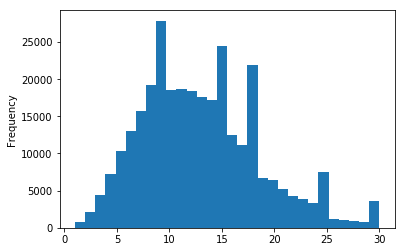

In [40]:
data_df.NDX.plot.hist(bins=30)

In [36]:
DX1_series = data_df.DX1
DX_series = pd.concat([data_df[DX] for DX in DXs])
PR_series = pd.concat([data_df[PR] for PR in PRs])

In [37]:
DX1_series.value_counts().describe()

count        20.000000
mean       9363.700000
std       29064.530411
min           2.000000
25%          13.000000
50%         561.000000
75%        3897.000000
max      130594.000000
Name: DX1, dtype: float64

In [51]:
dx_label.loc['41401', 'longdesc']

'Coronary atherosclerosis of native coronary artery'

In [38]:
DX_series.value_counts().describe()

count      5491.000000
mean        402.001275
std        3503.437688
min           1.000000
25%           2.000000
50%           7.000000
75%          48.000000
max      142857.000000
dtype: float64

In [39]:
PR_series.value_counts().describe()

count      1270.000000
mean        832.175591
std        7761.998178
min           1.000000
25%           1.000000
50%           4.000000
75%          22.750000
max      132949.000000
dtype: float64

In [46]:
DX_freq = pd.concat([data_df[DX] for DX in DXs]).value_counts()

In [47]:
DX_freq.head()

4019     132879
2724      94039
4280      67545
25000     63402
53081     62968
dtype: int64

## Create the input data for prediction with comorbidities

In [36]:
severity_cols = ['APRDRG', 'APRDRG_Risk_Mortality', 'APRDRG_Severity', 'CM_AIDS',
       'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF',
       'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG',
       'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS',
       'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH',
       'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE',
       'CM_WGHTLOSS', 'HOSP_NRD', 'KEY_NRD']

severity_labels = ['All Patient Refined DRG', 'All Patient Refined DRG: Risk of Mortality Subclass', 'All Patient Refined DRG: Severity of Illness Subclass', 'AHRQ comorbidity measure: Acquired immune deficiency syndrome', 'AHRQ comorbidity measure: Alcohol abuse', 'AHRQ comorbidity measure: Deficiency anemias', 'AHRQ comorbidity measure: Rheumatoid arthritis/collagen vascular diseases', 'AHRQ comorbidity measure: Chronic blood loss anemia', 'AHRQ comorbidity measure: Congestive heart failure', 'AHRQ comorbidity measure: Chronic pulmonary disease', 'AHRQ comorbidity measure: Coagulopathy', 'AHRQ comorbidity measure: Depression', 'AHRQ comorbidity measure: Diabetes, uncomplicated', 'AHRQ comorbidity measure: Diabetes with chronic complications', 'AHRQ comorbidity measure: Drug abuse', 'AHRQ comorbidity measure: Hypertension (combine uncomplicated and complicated)', 'AHRQ comorbidity measure: Hypothyroidism', 'AHRQ comorbidity measure: Liver disease', 'AHRQ comorbidity measure: Lymphoma', 'AHRQ comorbidity measure: Fluid and electrolyte disorders', 'AHRQ comorbidity measure: Metastatic cancer', 'AHRQ comorbidity measure: Other neurological disorders', 'AHRQ comorbidity measure: Obesity', 'AHRQ comorbidity measure: Paralysis', 'AHRQ comorbidity measure: Peripheral vascular disorders', 'AHRQ comorbidity measure: Psychoses', 'AHRQ comorbidity measure: Pulmonary circulation disorders', 'AHRQ comorbidity measure: Renal failure', 'AHRQ comorbidity measure: Solid tumor without metastasis', 'AHRQ comorbidity measure: Peptic ulcer disease excluding bleeding', 'AHRQ comorbidity measure: Valvular disease', 'AHRQ comorbidity measure: Weight loss', 'NRD hospital identifier', 'NRD record identifier']

severity_dtypes_pd = dict(zip(severity_cols, [float]*len(severity_cols)))

In [37]:
severity = pd.read_table(path+'raw/2014/NRD_2014_Severity.CSV', sep=',', 
                           header = None, 
                           names=severity_cols, 
                           dtype=severity_dtypes_pd, 
                           na_values=na_values)

In [8]:
severity.shape

(14894613, 34)

In [45]:
ami_severity = severity.loc[severity['KEY_NRD'].isin(ami_label['KEY_NRD'])]

In [35]:
ami_severity.shape

(187055, 34)

In [98]:
comorb = [n for n in severity_cols if n.startswith('CM')]

In [89]:
comorb_df = pd.merge(ami_severity[comorb+['KEY_NRD']], ami_label[['AGE', 'FEMALE', 'HOSP_NRD', 'KEY_NRD', 'NRD_VisitLink', 'NRD_DaysToEvent', 'readm30']], on='KEY_NRD')

In [94]:
comorb_df.shape

(305936, 36)

In [90]:
comorb_df.to_csv(path+'cohorts/pna/comorbidities.csv', index=False)

Distribution of number of comorbidities for each admission:

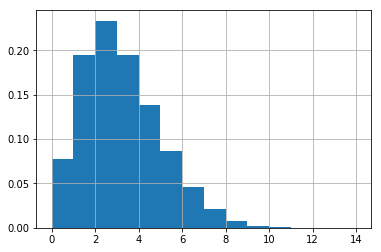

In [14]:
comorb_df[comorb].apply(sum, axis=1).hist(bins=14, density=1)

## Create data set for Prediction model
This dataset includes all potential predictiors, but only the first admission of each patient. 

In [124]:
cohort = 'pna'

In [125]:
ami_label = pd.read_csv(path+'cohorts20/{}/{}_index.csv'.format(cohort, cohort), dtype=core_dtypes_pd)

In [129]:
ami_label = pd.read_csv(path+'cohorts20/{}/{}_pred.csv'.format(cohort, cohort), dtype=core_dtypes_pd)

Index admission cohorts for calculating hospital readmission rate, with all predictors including comorbidities:

In [91]:
ami_severity = severity.loc[severity['KEY_NRD'].isin(ami_label['KEY_NRD'])]

In [92]:
ami_pred = pd.merge(ami_label, ami_severity[list(ami_severity.columns.difference(ami_label.columns))+['KEY_NRD']], on='KEY_NRD')

In [128]:
ami_pred.to_csv(path+'cohorts20/{}/index_comorb.csv'.format(cohort))

In [132]:
ami_pred.to_csv(path+'cohorts20/{}/pred_comorb.csv'.format(cohort))

In [93]:
ami_pred.to_csv(path+'elder/cohorts10/{}/pred_comorb.csv'.format(cohort))

In [26]:
index_comorb = pd.read_csv(path+'cohorts/{}/index_comorb.csv'.format(cohort), dtype=core_dtypes_pd)

In [27]:
pred = pd.read_csv(path+'cohorts/{}/{}_pred.csv'.format(cohort, cohort), dtype=core_dtypes_pd)

In [28]:
index_comorb1 = index_comorb.loc[index_comorb.HOSP_NRD.isin(set(pred.HOSP_NRD.values))]

In [29]:
index_comorb.shape, pred.shape, index_comorb1.shape

((325192, 183), (305936, 179), (325142, 183))

In [30]:
len(index_comorb1.HOSP_NRD.unique()), len(index_comorb1.HOSP_NRD.unique())

(1908, 1908)

In [31]:
index_comorb1.to_csv(path+'cohorts/{}/index_comorb.csv'.format(cohort), index=False)

## Cross-Validation Splitting

In [145]:
cohort = 'pna'
folder = 'elder/cohorts10/'

In [146]:
data_df = pd.read_csv(path+folder+'{}/pred_comorb.csv'.format(cohort), dtype=core_dtypes_pd)

In [135]:
from sklearn.model_selection import StratifiedKFold

In [136]:
skf = StratifiedKFold(n_splits=10, random_state=24, shuffle=True)

In [154]:
data_df.head(20)

,Unnamed: 0,AGE,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DMONTH,DQTR,DRG,DRGVER,...,CM_OBESE,CM_PARA,CM_PERIVASC,CM_PSYCH,CM_PULMCIRC,CM_RENLFAIL,CM_TUMOR,CM_ULCER,CM_VALVE,CM_WGHTLOSS
0,0,65.0,0.0,0.0,2.046126,6.0,1.0,1.0,249.0,31.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,72.0,0.0,0.0,1.435778,1.0,10.0,4.0,280.0,32.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,57.0,0.0,0.0,2.308072,1.0,11.0,4.0,282.0,32.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,61.0,0.0,0.0,5.119861,1.0,11.0,4.0,247.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,61.0,0.0,0.0,1.910494,6.0,8.0,3.0,264.0,31.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,5,49.0,1.0,0.0,1.962383,1.0,3.0,1.0,247.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,62.0,0.0,0.0,1.962383,1.0,10.0,4.0,248.0,32.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,60.0,1.0,0.0,2.004409,1.0,8.0,3.0,233.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,63.0,1.0,0.0,1.985053,1.0,6.0,2.0,282.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,78.0,0.0,0.0,1.347743,6.0,1.0,1.0,280.0,31.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [147]:
tst_keys = []
for train_idx, tst_idx in skf.split(data_df, data_df.HOSP_NRD):
    tst_keys.append(data_df.loc[tst_idx, 'KEY_NRD'])

In [148]:
for tst_key in tst_keys:
    print(len(data_df.loc[data_df.KEY_NRD.isin(tst_key), 'HOSP_NRD'].value_counts()))

1749
1749
1749
1749
1749
1749
1749
1749
1749
1749


In [149]:
for j, tst_key in enumerate(tst_keys):
    tst_key.to_csv(path+'cohorts20/{}/tst_key{}.csv'.format(cohort, j), index=False)

## Medical History of Each Paitent

In [35]:
index_pred = pd.read_csv(path+'cohorts/pna_index.csv', dtype=core_dtypes_pd)

In [36]:
index_pred.shape

(325192, 150)

In [37]:
index_pred = index_pred.drop_duplicates(subset=['NRD_VisitLink'], keep='last')

In [38]:
history = pd.DataFrame()

In [39]:
chunked = pd.read_table(path+'raw/2014/NRD_2014_Core.CSV', sep=',', 
                           header = None, 
                           names=core_cols, 
                           dtype=core_dtypes_pd, 
                           na_values=na_values, 
                           chunksize=10**6)

In [40]:
chunk_id = 0
for chunk in chunked:
    start = time.time()
    hist = chunk.loc[chunk.NRD_VisitLink.isin(index_pred.NRD_VisitLink)]
    history = pd.concat([history, hist], axis=0)
    print('It takes {:.1f} seconds to finish chunk {}. {} record were read in history.'.format(time.time()-start, chunk_id, 
                                                                                               len(hist)))
    chunk_id += 1

It takes 0.5 seconds to finish chunk 0. 42357 record were read in history.
It takes 0.7 seconds to finish chunk 1. 48144 record were read in history.
It takes 0.9 seconds to finish chunk 2. 43994 record were read in history.
It takes 1.0 seconds to finish chunk 3. 43822 record were read in history.
It takes 1.3 seconds to finish chunk 4. 44787 record were read in history.
It takes 1.5 seconds to finish chunk 5. 45031 record were read in history.
It takes 1.8 seconds to finish chunk 6. 43357 record were read in history.
It takes 2.1 seconds to finish chunk 7. 43959 record were read in history.
It takes 2.6 seconds to finish chunk 8. 42973 record were read in history.
It takes 3.0 seconds to finish chunk 9. 41251 record were read in history.
It takes 2.8 seconds to finish chunk 10. 40497 record were read in history.
It takes 3.3 seconds to finish chunk 11. 45268 record were read in history.
It takes 4.0 seconds to finish chunk 12. 47074 record were read in history.
It takes 4.3 seconds t

In [41]:
freq = history.NRD_VisitLink.value_counts()

In [42]:
sum(freq>3)/len(freq)

0.1511008853490903

### backups

In [67]:
severity2014 = pd.read_sas(path+'sas/nrd_severity_2014.sas7bdat', chunksize=10**6)

In [75]:
core2014 = pd.read_sas(path+'sas/nrd_core_2014.sas7bdat', chunksize=10000)

In [72]:
dxpr2014 = pd.read_sas(path+'sas/nrd_dx_pr_grps_2014.sas7bdat', chunksize=1000)

In [61]:
core_dtypes_logic[core_cols.index('TOTCHG')] = 'continuous'

In [40]:
ami['PRDAY1'].describe()

count    220134.000000
mean          1.175638
std           2.641674
min          -4.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         365.000000
Name: PRDAY1, dtype: float64

In [64]:
ami['ZIPINC_QRTL'].value_counts(dropna=False)

 1.0    72043
 2.0    70457
 3.0    59103
 4.0    52113
NaN      4598
Name: ZIPINC_QRTL, dtype: int64

Create a label whether this admission is a subsequent readmission following a planned admission (not necessary any more):

In [69]:
planned = readm_sort.loc[readm_sort['planned']==True, ['NRD_VisitLink', 'NRD_DaysToEvent']]

In [71]:
patient_planned = set(planned['NRD_VisitLink'].unique())

In [72]:
sub_df = readm_sort.loc[readm_sort['NRD_VisitLink'].isin(patient_planned)]

In [74]:
patient_freq = sub_df['NRD_VisitLink'].value_counts()

In [75]:
sub_df = sub_df.loc[sub_df['NRD_VisitLink'].isin(patient_freq[patient_freq>1].index)]

In [78]:
sub_df['planned_subsequent'] = False

In [80]:
sub_df = sub_df.reset_index()

In [88]:
start = time.time()
pln_sub = False
j = 0
patient = sub_df.loc[j, 'NRD_VisitLink']
while j<len(sub_df):
    if pln_sub:
        if sub_df.loc[j, 'NRD_VisitLink'] == patient:
            sub_df.loc[j, 'planned_subsequent'] = True
        else:
            pln_sub = False
    if sub_df.loc[j, 'planned'] == True:
        patient = sub_df.loc[j, 'NRD_VisitLink']
        pln_sub = True
    j += 1
print(time.time()-start)

3234.76953125


In [92]:
key_subseq = set(sub_df.loc[sub_df['planned_subsequent'], 'KEY_NRD'].values)

In [97]:
readm_sort['planned_subseq'] = readm_sort['KEY_NRD'].isin(key_subseq)

The next label means whether this admission is followed by an admission that is neither planned nor planned subseqent:

In [101]:
readm_sort['readm_nosubseq'] = (readm_sort['readm'] == True) & (shifted['planned_subseq'] == False)

In [106]:
pd.crosstab(index=readm_sort['readm'], columns=readm_sort['readm_nosubseq'], margins=True)

readm_nosubseq,False,True,All
readm,,,
False,11143020,0,11143020
True,221244,3529329,3750573
All,11364264,3529329,14893593


In [8]:
readm_sort['planned'] = readm_sort['PRCCS1'].isin(tablePR1_PRCCS) | readm_sort['DXCCS1'].isin(tablePR2_DXCCS) | ((readm_sort['PRCCS1'].isin(tablePR3_PRCCS) | readm_sort['PR1'].isin(tablePR3_PR)) & (~(readm_sort['DXCCS1'].isin(tablePR4_DXCCS) | readm_sort['DX1'].isin(tablePR4_DX))))